# Project 2: How does lifestyle affect bloodpressure

## Introduction

Many college students do not get the recommended 6 to 8 hours of sleep each night, and it is common for students to spend hours looking at screens as they stay up well into the night completing assignments. When they do go to rest, many will lay in bed looking at their phones for a bit.

This project's purpose is to develope a model to determine whether or not someone has high blood pressure based off of their lifestyle, health, and body information.

The [dataset](https://www.kaggle.com/datasets/arifmia/sleep-health-and-digital-screen-exposure-dataset) used for this project looks at sleep and blood pressure for people.

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [84]:
df = pd.read_csv("Dry_Eye_Dataset.csv")

## Preprocessing

This dataset had no null values, however, many of the columns were of object datatype. This was solved by writing a loop to get dummies for columbs whose datatype was object. Another issue with the dataset is that the blood pressure column would have to be analyzed to decide whether the patient has high blood pressure. This issue was solved by finding an equation for [mean arterial pressure](https://www.ncbi.nlm.nih.gov/books/NBK538226/) and writing a function to calculate the mean arterial pressure for each patient based off of their diastolic and systolic blood pressure, and getting a true or false value on whether or not they have high blood pressure based off of their mean arterial pressure.

In [85]:
df.isnull().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

In [86]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [87]:
#function to calculate mean arterial pressure (MPA)
def map(string):
    high_bp = False
    y = str(string).split("/")
    systolic = float(y[0])
    diastolic = float(y[1])
    mean_pressure = diastolic + (1/3) * (systolic - diastolic)
    if mean_pressure > 99:
        high_bp = True
    return high_bp
    

In [88]:
bp_df = df
bp_df['High blood pressure'] = df['Blood pressure'].apply(map)

In [89]:
bp_df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,High blood pressure
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,Y,Y,N,8.7,N,Y,Y,N,Y,True
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,Y,Y,N,9.6,Y,N,N,Y,Y,False
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,Y,4.0,N,Y,N,N,N,False
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,Y,N,N,7.6,N,Y,N,Y,N,False
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,Y,N,N,3.5,N,Y,Y,N,Y,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,Y,3.8,N,Y,N,Y,Y,False
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,Y,Y,N,3.8,N,N,Y,N,Y,False
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,Y,N,N,8.4,N,N,Y,N,N,False
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,N,Y,N,2.2,N,N,N,Y,Y,False


## Visualization

Looking at this data set, using a singular visualization, there is not much correlation between high blood pressure and any of the other features. Though finding manual correlations may be difficult, using a model, a more detailed analysis can be done, allowing for more insight to be found.

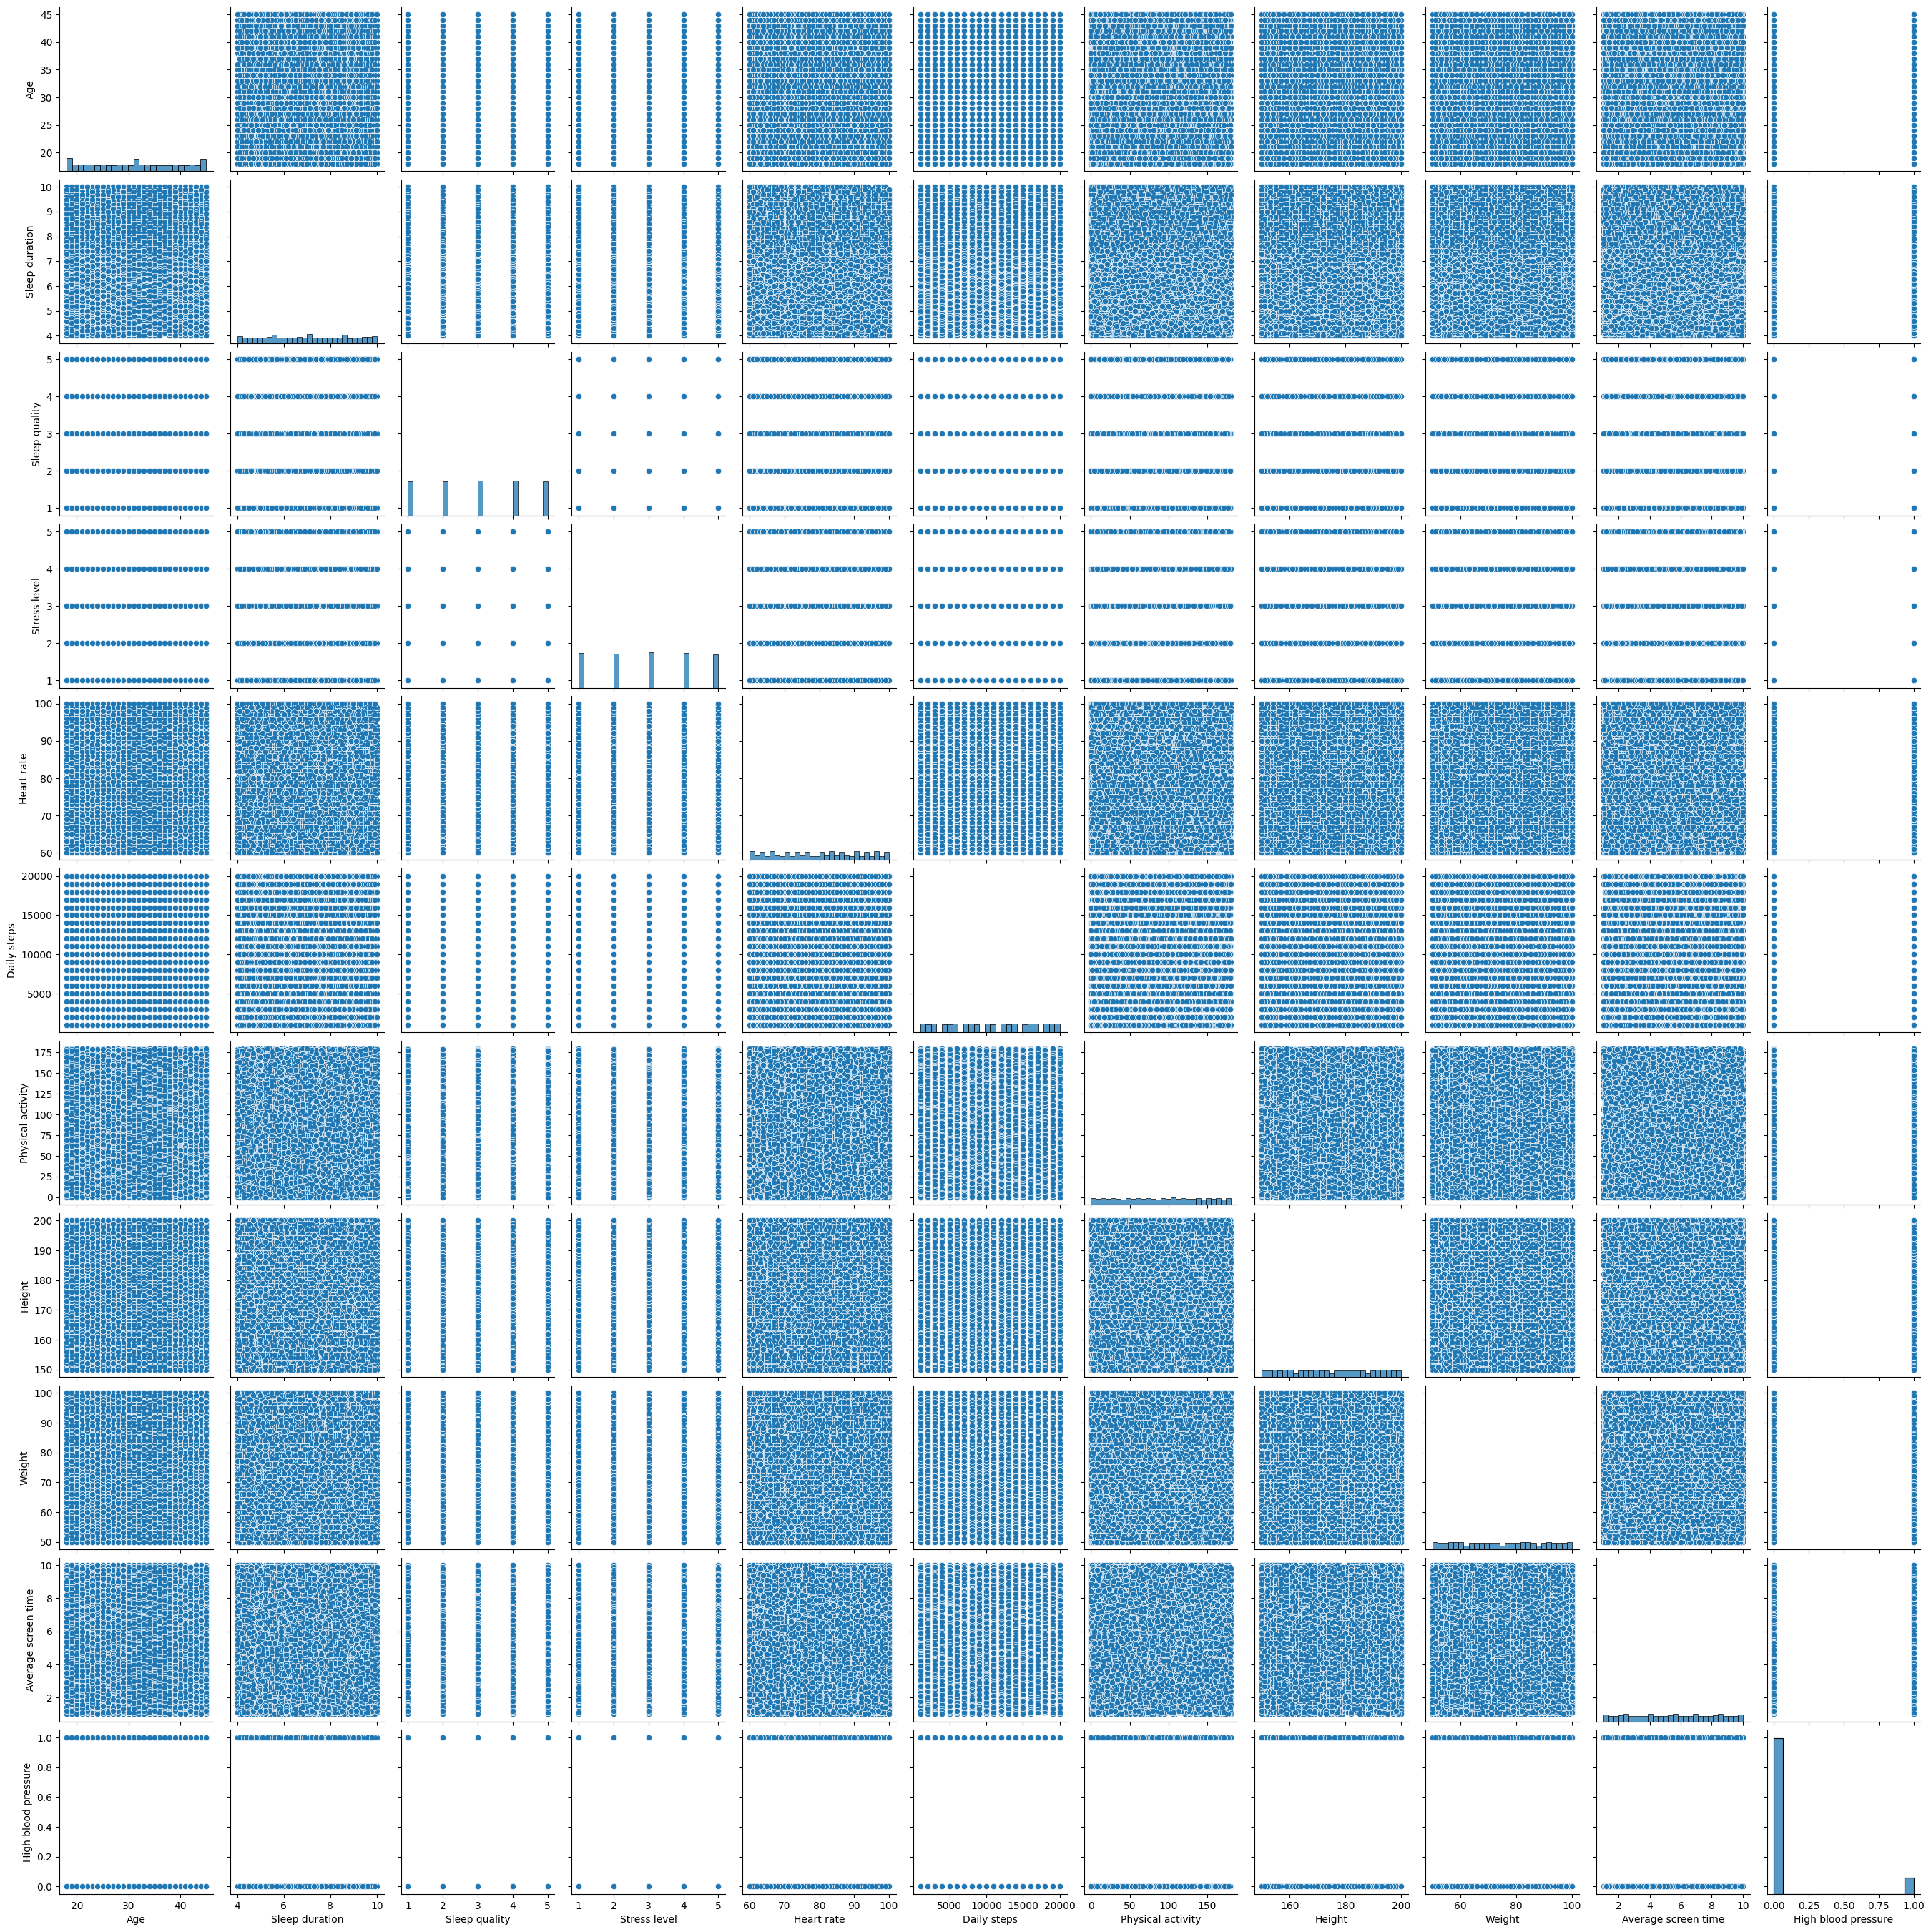

In [91]:
sns.pairplot(data=bp_df)

In [90]:
bp_df.drop(columns = ['Blood pressure'], inplace = True)

In [70]:
bp_df.dtypes

Gender                          object
Age                              int64
Sleep duration                 float64
Sleep quality                    int64
Stress level                     int64
Heart rate                       int64
Daily steps                      int64
Physical activity                int64
Height                           int64
Weight                           int64
Sleep disorder                  object
Wake up during night            object
Feel sleepy during day          object
Caffeine consumption            object
Alcohol consumption             object
Smoking                         object
Medical issue                   object
Ongoing medication              object
Smart device before bed         object
Average screen time            float64
Blue-light filter               object
Discomfort Eye-strain           object
Redness in eye                  object
Itchiness/Irritation in eye     object
Dry Eye Disease                 object
High blood pressure      

Columns that had data types of object were cleaned by getting dummies for them

In [71]:
#df = pd.get_dummies(df, columns = ['Gender', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', ], drop_first=True)

for col in bp_df:
    if bp_df[col].dtype == object:
        bp_df = pd.get_dummies(bp_df, columns = [col])

In [72]:
bp_df

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,...,Blue-light filter_N,Blue-light filter_Y,Discomfort Eye-strain_N,Discomfort Eye-strain_Y,Redness in eye_N,Redness in eye_Y,Itchiness/Irritation in eye_N,Itchiness/Irritation in eye_Y,Dry Eye Disease_N,Dry Eye Disease_Y
0,24,9.5,2,1,67,3000,31,161,69,8.7,...,True,False,False,True,False,True,True,False,False,True
1,39,9.6,2,3,60,12000,74,164,87,9.6,...,False,True,True,False,True,False,False,True,False,True
2,45,5.4,1,5,95,12000,93,179,94,4.0,...,True,False,False,True,True,False,True,False,True,False
3,45,5.4,4,5,78,19000,32,160,77,7.6,...,True,False,False,True,True,False,False,True,True,False
4,42,5.7,3,2,72,4000,173,179,99,3.5,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,9.4,2,3,91,20000,88,200,72,3.8,...,True,False,False,True,True,False,False,True,False,True
19996,39,7.3,3,4,65,2000,53,195,96,3.8,...,True,False,True,False,False,True,True,False,False,True
19997,20,8.0,5,3,78,10000,17,186,87,8.4,...,True,False,True,False,False,True,True,False,True,False
19998,38,4.5,3,3,60,3000,115,170,66,2.2,...,True,False,True,False,True,False,False,True,False,True


In [73]:
X = bp_df.drop(columns = ['High blood pressure'])
y = bp_df['High blood pressure']


## Modeling

For this project, a decision tree was used to model the data and predict whether or not someone had high blood pressure. This was decided because blood pressure was recored as a true or galse value, and many of the variables used to decide where also boolean values. If instead of using the mean arterial pressure to decide whether or not someone has high blood pressure, ones mean arterial pressure itself was recorded, linear regression could possibly be used to getting the continous value.

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.8 ) #20% train, 80% test

In [76]:
from sklearn import tree

In [77]:
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

In [78]:
clf = clf.fit(X_train, y_train) #fit training data to the model
predicted = clf.predict(X_test)
clf.score(X_test, y_test)

0.8074375

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.91      0.88      0.89     14533
        True       0.09      0.12      0.10      1467

    accuracy                           0.81     16000
   macro avg       0.50      0.50      0.50     16000
weighted avg       0.83      0.81      0.82     16000



In [80]:
fi = clf.feature_importances_ #feature importance array
fi = pd.Series(data = fi, index = X.columns) #convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) #sort descending

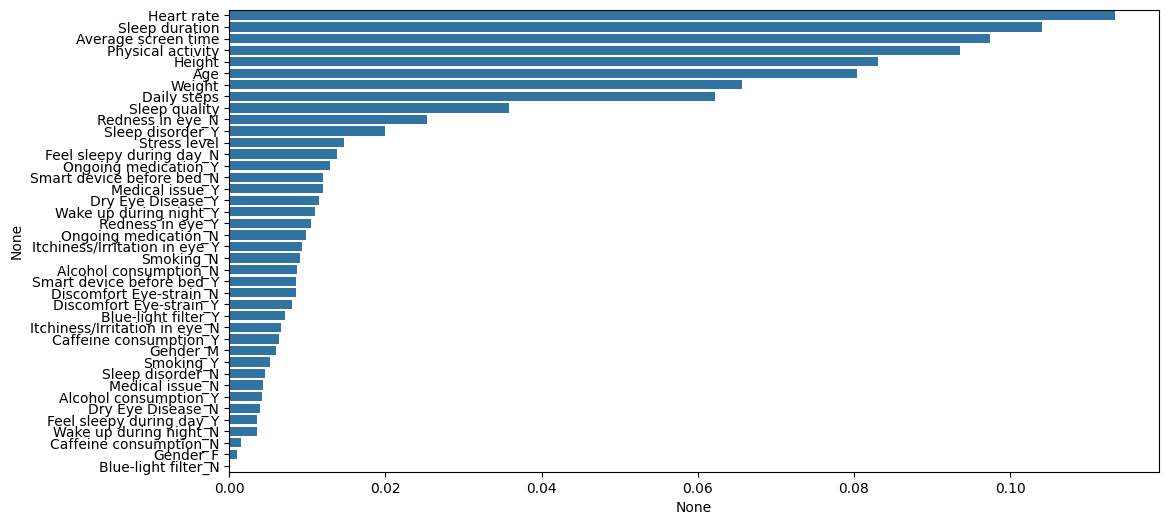

In [82]:
#create bar plot
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index)
plt.show()

## Storytelling

In this project, a model was trained to determine whether patients were likely to have a high mean arterial pressure, indicative of high blood pressure, based on their lifestyle and body.

The model has pretty good accuracy at around 80% for percision, recall, and f1-score. If this model were to be used to diagnosis people, and high recall score would be most valuable because falsely flagging someone as positive for high blood pressure is not as big as an issue as missing someone who actually does have high blood pressure.The recall score for this model was lower than both the precision and f1-score, but the difference was small.

When looking at the importance of features, it is not surprising that heart rate was one of the most important features. Heart rate, though not indicative of high blood pressure, can be a tell tale sign of heart issues. Many lifestyle features are highly important for the model, including sleep duration, average screentime, physical activity, and daily steps, which are all in the top 10 most important features for the model. The relationship between physical activty, daily steps, and high blood pressure is easy to see, but the importance of sleep duration, the second most important feature, was unexpected. It is also unexpected that feautres such as known medical conditions, ongoing medication, and stress level, are all lower in importance than lifestyle features such as sleep duration and daily screentime.

## Impact

This model has highlited the importance of lifestyle as a factor when it comes to developing high blood pressur. This could be used to help support body positivity, and using more detailed assessments to determine what is an is not healthy. One potential harm of this model is the possibility of it supporting weight and age descrimination as those were two of the higher features the model used to make decisions. My hope is that these findings support a more detailed and personalized approach to healthcare and health risk assessment.

## References 

1. [Dataset](https://www.kaggle.com/datasets/arifmia/sleep-health-and-digital-screen-exposure-dataset)
2. [Mean arterial pressure](https://www.ncbi.nlm.nih.gov/books/NBK538226/)